In [1]:
import logging
import datetime

import matplotlib.pyplot as plt
import requests

import ddlpy

# show what's happening in the background
# this makes sure that we see log messages in the notebook
logging.basicConfig()
# show log messages of ddlpy
ddlpy.ddlpy.logger.setLevel(logging.DEBUG)

%matplotlib inline

# Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:ddlpy.ddlpy:requesting: https://waterwebservices.rijkswaterstaat.nl/METADATASERVICES_DBO/OphalenCatalogus with {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Parameters": true, "Compartimenten": true}}


In [3]:
locations.to_json(r'locations.json', orient='records')

In [4]:
# also add code as a variable
locations['Code'] = locations.index
locations.head()

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
ROTTMPT3,9486,25831,735924.084551,5.941073e+06,Rottumerplaat 3 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,ROTTMPT3
SCHOUWN10,9510,25831,534120.858324,5.729921e+06,Schouwen 10 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,SCHOUWN10
TERSLG235,9518,25831,509938.998556,6.113888e+06,Terschelling 235 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,TERSLG235
WALCRN2,9526,25831,528394.396027,5.710854e+06,Walcheren 2 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,WALCRN2
GOERE6,9542,25831,560056.490959,5.746818e+06,Goeree 6 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,GOERE6


## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

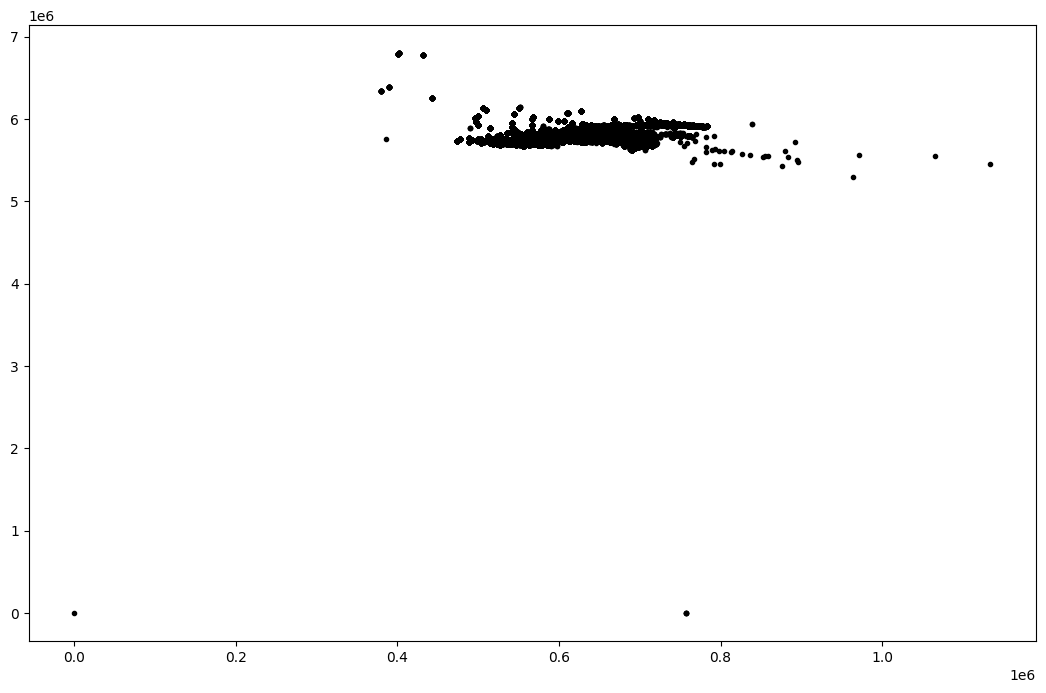

In [5]:
# Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.X, locations.Y, 'k.')

In [6]:
# CHECK See what the data in the east is.
# These is a reference river for water quality near Chernobyl. 
locations.sort_values('X',  ascending=False).head(n=5)

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
RIEDBG,11039,25831,1.133985e+06,5.460049e+06,Riedenburg,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,RIEDBG
BAMBG,13481,25831,1.066035e+06,5.555525e+06,Bamberg,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,BAMBG
STEINBCH,11103,25831,9.715529e+05,5.559332e+06,Steinbach,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,STEINBCH
KONSZ,13512,25831,9.642014e+05,5.295846e+06,Konstanz,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,KONSZ
SPEYER,11067,25831,8.958191e+05,5.477785e+06,Speyer,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,SPEYER


In [7]:
codes = ['HOEKVHLD', 'IJMDBTHVN','SCHEVNGN']
parameters = ['WATHTE']
selected = locations[locations.index.isin(codes)]
selected = selected[selected['Grootheid.Code'].isin(parameters)]
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
HOEKVHLD,10399,25831,576917.669784,5.759136e+06,Hoek van Holland,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,HOEKVHLD
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN
IJMDBTHVN,10414,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,IJMDBTHVN


In [8]:
names = 'uit de kust'
selected = locations[locations.Naam.str.contains(names)].head()
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
ROTTMPT3,9486,25831,735924.084551,5.941073e+06,Rottumerplaat 3 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,ROTTMPT3
SCHOUWN10,9510,25831,534120.858324,5.729921e+06,Schouwen 10 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,SCHOUWN10
TERSLG235,9518,25831,509938.998556,6.113888e+06,Terschelling 235 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,TERSLG235
WALCRN2,9526,25831,528394.396027,5.710854e+06,Walcheren 2 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,WALCRN2
GOERE6,9542,25831,560056.490959,5.746818e+06,Goeree 6 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,GOERE6


In [9]:
# numtiple parameters avaialble per location
# each combination is a row
records = locations.loc['SCHEVNGN']
records

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte berekend Oppervlaktewater t.o.v. N...,OW,Oppervlaktewater,cm,centimeter,WATHTBRKD,Waterhoogte berekend,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte astronomisch Oppervlaktewater t.o....,OW,Oppervlaktewater,cm,centimeter,WATHTEASTRO,Waterhoogte astronomisch,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Levendigheid Oppervlaktewater cm2,OW,Oppervlaktewater,cm2,vierkante centimeter,NVT,Waarde is niet van toepassing,NVT,niet van toepassing,NVT,Waarde is niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Getijextreemtype Oppervlaktewater,OW,Oppervlaktewater,DIMSLS,dimensieloos,NVT,Waarde is niet van toepassing,NVT,niet van toepassing,NVT,Waarde is niet van toepassing,SCHEVNGN


In [10]:
# if we pass one row to the measurements function you can get all the measurements
measurements = ddlpy.measurements(records.iloc[0], datetime.datetime(2019,1,1), datetime.datetime(2020,2,1))

DEBUG:ddlpy.ddlpy:requesting:  {'AquoMetadataLijst': [{'Eenheid': {'Code': 'cm'}, 'Grootheid': {'Code': 'WATHTBRKD'}, 'Hoedanigheid': {'Code': 'NAP'}}], 'LocatieLijst': [{'X': 586550.994420996, 'Y': 5772806.43069697, 'Code': 'SCHEVNGN'}], 'Periode': {'Begindatumtijd': '2019-01-01T00:00:00.000+00:00', 'Einddatumtijd': '2020-02-01T00:00:00.000+00:00'}}
100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:18<00:00,  1.40s/it]
DEBUG:ddlpy.ddlpy:12 duplicated values dropped


<Axes: xlabel='time'>

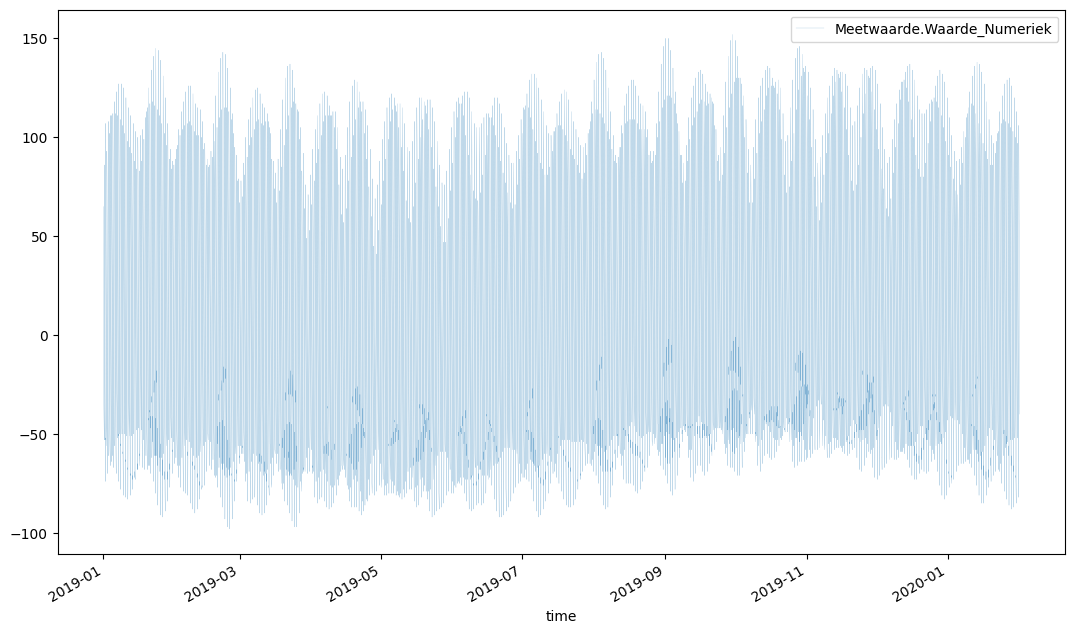

In [11]:
measurements.plot(y='Meetwaarde.Waarde_Numeriek', linewidth=0.1, figsize=(13, 8))

In [12]:
measurements

,WaarnemingMetadata.StatuswaardeLijst,WaarnemingMetadata.BemonsteringshoogteLijst,WaarnemingMetadata.ReferentievlakLijst,WaarnemingMetadata.OpdrachtgevendeInstantieLijst,WaarnemingMetadata.KwaliteitswaardecodeLijst,Tijdstip,AquoMetadata_MessageID,Parameter_Wat_Omschrijving,BemonsteringsApparaat.Code,BemonsteringsApparaat.Omschrijving,...,WaardeBepalingsmethode.Omschrijving,WaardeBewerkingsmethode.Code,WaardeBewerkingsmethode.Omschrijving,Meetwaarde.Waarde_Numeriek,Meetwaarde.Waarde_Alfanumeriek,Code,Coordinatenstelsel,Naam,X,Y
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2019-01-01T01:00:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,65.0,65,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 01:10:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2019-01-01T01:10:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,59.0,59,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 01:20:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2019-01-01T01:20:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,53.0,53,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 01:30:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2019-01-01T01:30:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,47.0,47,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 01:40:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2019-01-01T01:40:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,41.0,41,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01 00:20:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2020-02-01T00:20:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-31.0,-31,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2020-02-01 00:30:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2020-02-01T00:30:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-33.0,-33,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2020-02-01 00:40:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,2020-02-01T00:40:00.000+01:00,3382,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-36.0,-36,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
